# Re-making Fig.1 plot from paper

[Time domain phenomenological model of gravitational wave subdominant harmonics for quasi-circular non-precessing binary black hole coalescences](http://arxiv.org/abs/2012.11923)

Their inspiral collocation points are based on the TaylorT3 $\theta$ variable.

In [1]:
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = True

In [2]:
import phenom

In [3]:
import numpy as np

In [4]:
from prim import taylort3

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/prim/taylort3.py:20: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import GAMMA, MTSUN_SI


In [5]:
taylort3.TaylorT3_theta(-1000, 0, 0.25, 1)

0.613237563517304

In [6]:
t_from_theta = taylort3.TaylorT3_t(0.33, 0, 0.25, 1)
t_from_theta

-142206.1820483869

In [7]:
taylort3.TaylorT3_theta(t_from_theta, 0, 0.25, 1)

0.33

In [42]:
theta_array = np.linspace(0.1, 1, 100)

In [43]:
theta_collocation = [0.1, 0.33, 0.45, 0.55, 0.65, 0.75, 0.82]

Text(0, 0.5, '$-t (M)$')

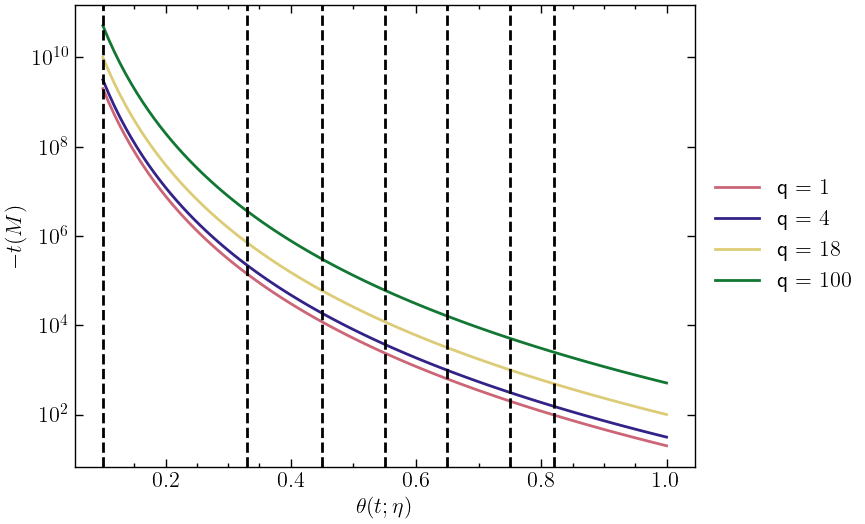

In [45]:
qs = [1, 4, 18, 100]
for q in qs:
    eta = phenom.eta_from_q(q)
    t_from_theta = taylort3.TaylorT3_t(theta_array, 0, eta, 1)
    plt.plot(theta_array, -t_from_theta, label=fr"q = ${q}$")
plt.yscale('log')
for tc in theta_collocation:
    plt.axvline(tc, c='k', ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\theta(t;\eta)$")
plt.ylabel(r"$-t (M)$")

# what is the frequency of the 1st collocation point?

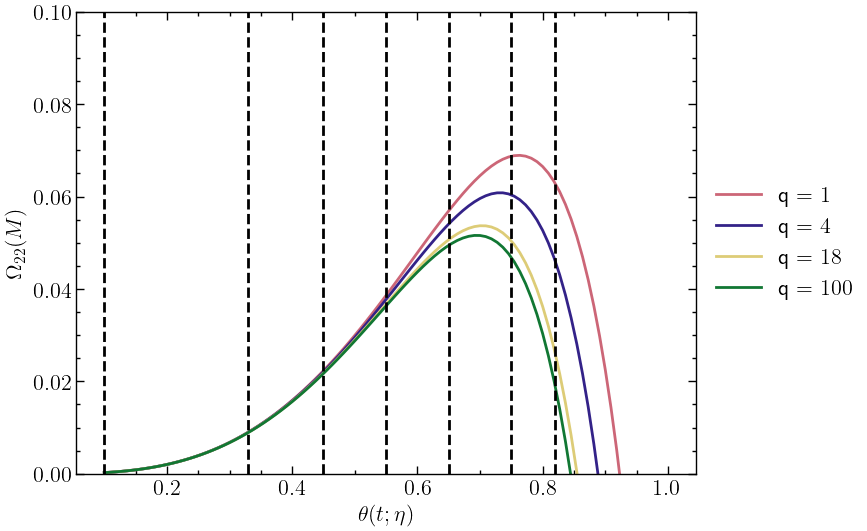

In [70]:
qs = [1, 4, 18, 100]
for q in qs:
    eta = phenom.eta_from_q(q)
    t_from_theta = taylort3.TaylorT3_t(theta_array, 0, eta, 1)
    # plt.plot(theta_array, -t_from_theta, label=fr"q = ${q}$")

    Omega_GW = taylort3.TaylorT3_Omega_GW(t_from_theta, 0, eta, 1, 0, 0)
    plt.plot(theta_array, Omega_GW, label=fr"q = ${q}$")
# plt.yscale('log')
for tc in theta_collocation:
    plt.axvline(tc, c='k', ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\theta(t;\eta)$")
plt.ylabel(r"$\Omega_{22} (M)$")
plt.ylim(0, 0.1);

(0.0, 0.02)

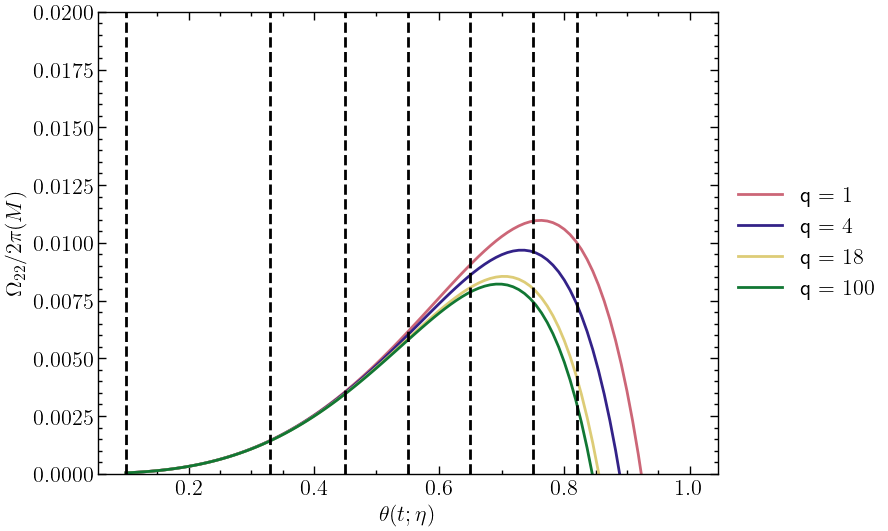

In [67]:
qs = [1, 4, 18, 100]
for q in qs:
    eta = phenom.eta_from_q(q)
    t_from_theta = taylort3.TaylorT3_t(theta_array, 0, eta, 1)
    # plt.plot(theta_array, -t_from_theta, label=fr"q = ${q}$")

    Omega_GW = taylort3.TaylorT3_Omega_GW(t_from_theta, 0, eta, 1, 0, 0)
    plt.plot(theta_array, Omega_GW/2/np.pi, label=fr"q = ${q}$")
# plt.yscale('log')
for tc in theta_collocation:
    plt.axvline(tc, c='k', ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\theta(t;\eta)$")
plt.ylabel(r"$\Omega_{22}/2\pi (M)$")
plt.ylim(0, 0.02);

In [73]:
phenom.MftoHz(0.002, 10)

40.605088703429985

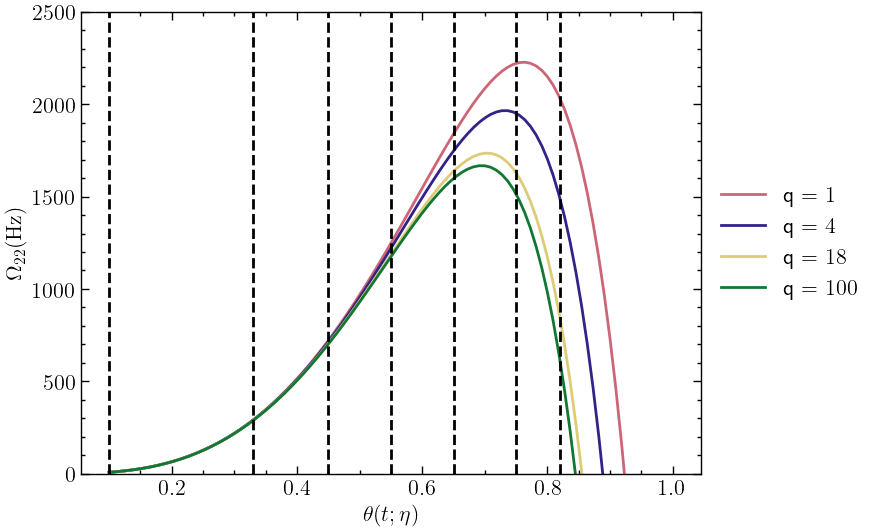

In [58]:
M = 1
qs = [1, 4, 18, 100]
for q in qs:
    eta = phenom.eta_from_q(q)
    t_from_theta = taylort3.TaylorT3_t(theta_array, 0, eta, 1)
    Omega_GW = taylort3.TaylorT3_Omega_GW(t_from_theta, 0, eta, M, 0, 0)
    Omega_GW_Hz = phenom.MftoHz(Omega_GW/2/np.pi, M)
    plt.plot(theta_array, Omega_GW_Hz, label=fr"q = ${q}$")
# plt.yscale('log')
for tc in theta_collocation:
    plt.axvline(tc, c='k', ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\theta(t;\eta)$")
plt.ylabel(r"$\Omega_{22} (\rm{Hz})$")
plt.ylim(0, 2500);